# Homework 7: Dimension Reduction

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [1]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skp

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# feel free to change the file location 
df_train = pd.read_csv("./data/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("./data/data_set_ALL_AML_independent.csv")

In [3]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

In [4]:
[df_train.shape, df_test.shape]

[(40, 7129), (36, 7129)]

In [5]:
df_train.index

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [6]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [8]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
count,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
unique,37,37,37,39,40,38,39,40,36,38,...,35,40,38,40,38,40,39,33,38,38
top,-81,-114,-1,132,-407,-284,-31,-194,206,350,...,103,1215,57,255,-22,987,295,26,246,-41
freq,2,2,2,2,1,2,2,1,2,2,...,2,1,3,1,2,1,2,2,2,2


In [9]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [10]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
count,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
unique,35,35,34,34,35,35,35,33,31,35,...,34,35,34,33,32,36,34,30,36,32
top,-62,-118,12,146,-201,-493,-222,-152,-6,157,...,214,690,-34,201,2,893,174,0,112,-71
freq,2,2,2,2,2,2,2,2,3,2,...,2,2,2,2,2,1,2,5,1,2


### Convert Train df to numeric indices, then scale the data

In [11]:
#--Drop column names and insert numeric indices--
df = df_train.drop(['Gene Description','Gene Accession Number'],axis=0)
df.index = pd.to_numeric(df.index)
df.sort_index(inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [12]:
##__SCALE THE TRAINING DATA__

train_norm = df.copy() #--make a copy of the df
train_norm.ix[:,:] = skp.scale(train_norm.ix[:,:].astype(np.float)) #--use sklearn scale to scale/normalize the data
train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


In [65]:
# labeled_df['cat'] = list(pd.read_csv('./data/actual.csv')[:39]['cancer'])
# dic = {'ALL':0,'AML':1}
# labeled_df.replace(dic,inplace=True)
# labeled_df.head(3)

### Convert Test df to numeric indices, then scale the data

In [13]:
#--Drop column names and insert numeric indices--
df2 = df_test.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.sort_index(inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [14]:
##__SCALE THE TRAINING DATA__

test_norm = df2.copy() #--make a copy of the df
test_norm.ix[:,:] = skp.scale(test_norm.ix[:,:].astype(np.float)) #--use sklearn scale to scale/normalize the data
test_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.022196,1.556109,1.104685,-0.613631,-1.506468,1.001512,1.050378,0.909252,-0.394315,-0.784861
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.858006,-0.164410,-2.826066,-0.043162,-0.316934,-1.568936,-0.026902,-0.587509,-0.819890,0.229552
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-0.412185,-0.672903,0.876658,-1.068353,1.117503,-1.114577,-0.529972,1.574480,-0.538290,0.291659
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,2.340276,-0.617178,0.550906,0.808408,1.274941,0.539495,0.145869,0.133154,3.423164,-0.205196
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,1.642469,-1.689890,-0.534937,1.044037,-0.054537,1.412478,-1.317606,0.151633,2.521197,-1.012586


# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

#### 2D MDS

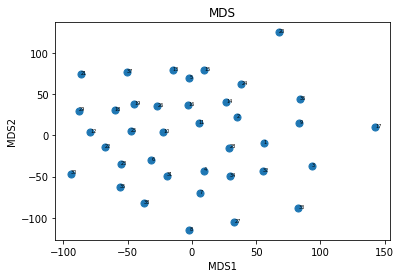

In [15]:
X = skm.MDS(n_components=2).fit_transform(train_norm) #--creates a multi-dimensional scale --> this line sets up the model and fits it
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(train_norm.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=5)

#### 3D MDS

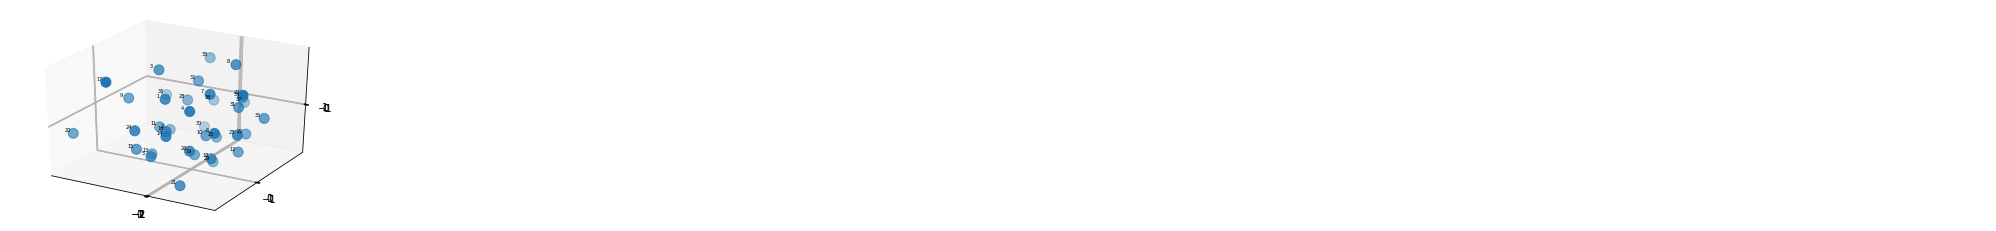

In [16]:
# We can also create 3d scatterplots.
X = skm.MDS(n_components=3).fit_transform(train_norm)

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=100)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])

for i, s in enumerate(train_norm.index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=5)



## 1.2. Interprete your results (10 pts.)

What can you see from your visualization(s)?

(YOUR INTERPRETATION HERE)

**2D MDS Plot**
I scaled the data during the preprocessing step in Part 0 before plotting the MDS. For the 2D MDS plot, we are looking at the relationship between the patient observaions in the data. There should be 38 observations as we are only looking at the training data here. An initial inspection shows what seem to be two somewhat distinct groups of data points. One of the groups consists of two points that are relatively close to one another, while the other group consistst of the rest of the 36 patient observations that are also relatively close to one another - some of the distances between points vary a bit, bot seem to generally belong to the larger, loose cluster. 

The smaller group, which could be considered as outliers to the larger loose cluster, include observations 20 and 17. These data points lie in the negative portion of the plot and are somewhat close to one another, yet far from the rest of the cluster. Considering this is a 2D MDS plot, it proportionally shows the distance of the non-scaled data, which I believe is over 7,000 features. This tells me that if we were to look at the actual dataset, the data that these two points represent are probably pretty far from the data represented by the other cluster. To me, this shows that the outliers must be somewhat similar to one another, yet not to the rest of the patient observations.

As noted in class, the visualization dimensions are not directly related to the original dimensions of the data, which could make it harder to interpret and/or explain the data. Also noted, while the datapoints may be a bit random each time the code is run, they have a tendency of maintaining a similar distance to one another. 


**3D MDS Plot**
From the 3D MDS plot, we can only see one point that seems to be an outlier, or data point 20. This part checks out with what we saw for the 2D plot, however, data point 17 does not look to be an outlier in this plot, it looks closer to the larger cluster, which tells me that while the distance in the x,y plane was further than the larger cluster for point 17, in the z plane it was not. It also tells me that data point 20 clearly looks like an outlier and has a further distance from the larger cluster. For the 3D plot, I can also see that data point 38 looks to be an outlier here; it looked to be at the top of the 2D plot and I was not sure if the distance was pronounced enough to call it an outlier. Here we can see that data point 38 seems to be further away from the larger cluster in the z plane. The 3D plot can better show certain distances of data points, however, still does not give a completely clear picture of all of the data points. From this plot, I noted that points 20 and 38 look to be outliers, while 17 does not seem to be as far from the largest cluster.   

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [17]:
pca_model = skd.PCA().fit(train_norm.ix[:,:])
pca_model.components_.shape

(38, 7129)

In [18]:
pca_model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

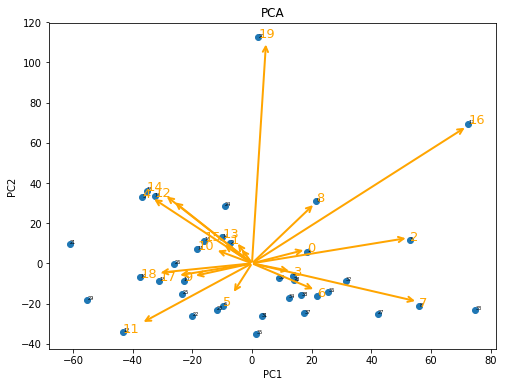

In [19]:
#--Create PCA biplot here--

X = pca_model.transform(train_norm)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
# plt.ylim(-4, 10)

for i, s in enumerate(train_norm.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=5)

V=X
# # Add variable unit vector projections
#V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V[:20]):
    plt.annotate(df.columns[i], 
                 xy=(0,0), xytext=v[:2]*1.0, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

## 2.2. How much of the variance does each component explain? (2 pts.)

In [20]:
#--Using non-scaled data--
#--where each component describes a patient and each --
pca_var = pca_model.explained_variance_
pca_var

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

In [21]:
#--Using scaled data--
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

(YOUR INTERPRETATION HERE)

In the explained variance, we can see the weight given for each data point, or patient observation in the training data. As expected, or as seen from the PCA biplot and in the MDS plot, there are a few points that seem to have values that are further away from the rest. The first and last points in particular seem to vary more from the rest of the data. All of the components in the explained variance should add up to one when combined. The points seem to go in descending order by degree of variance that each component explains.  

## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

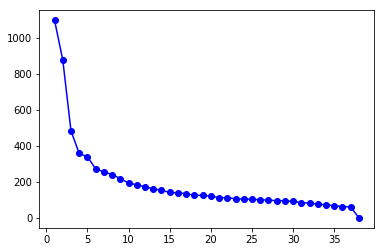

In [22]:
### YOUR CODE HERE ###
#--PCA is always constrained by the number of observations--
#--There are 6 components that explain most of the variance in the dataset; 6 things will tell you most of what you need
#--to know about the dataset

plt.plot(range(1,39),pca_model.explained_variance_,'b-o')

(YOUR INTERPRETATION HERE)

Looking at the Scree plot, it seems to flatten out at around 6, which shows me that either 5 or 6 components may be the best amount to keep for later analysis. This also shows me that the first 5 or 6 components will explain most of the interesting variation in the data. 5 or 6 components will be a good starting point for data exploration with clustering the data later on. 

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

In [37]:
X[:,1].shape

(38,)

In [38]:
df.ix[:,:].shape

(38, 7129)

In [114]:
X = pca_model.transform(df)
X.shape

(38, 38)

In [116]:
np.identity(X.shape[1])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Add category - this will help when showing the difference between categories of cancer type

In [23]:
train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


In [24]:
#--Source: https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification?scriptVersionId=1575888
df['cat'] = list(pd.read_csv('./data/actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df.replace(dic,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0


In [174]:
# cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

# sklearn_pca.explained_variance_ratio_[:10].sum()

# cum_sum = cum_sum*100

# fig, ax = plt.subplots(figsize=(8,8))
# plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
# plt.title("Around 95% of variance is explained by the Fisrt 30 colmns ");

In [55]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [56]:
X_reduced2 = Y_sklearn

In [57]:
train = pd.DataFrame(X_reduced2)
train['cat'] =  df['cat'].reset_index().cat
train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cat
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,...,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094,0
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,...,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588,0
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,...,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274,0


[]

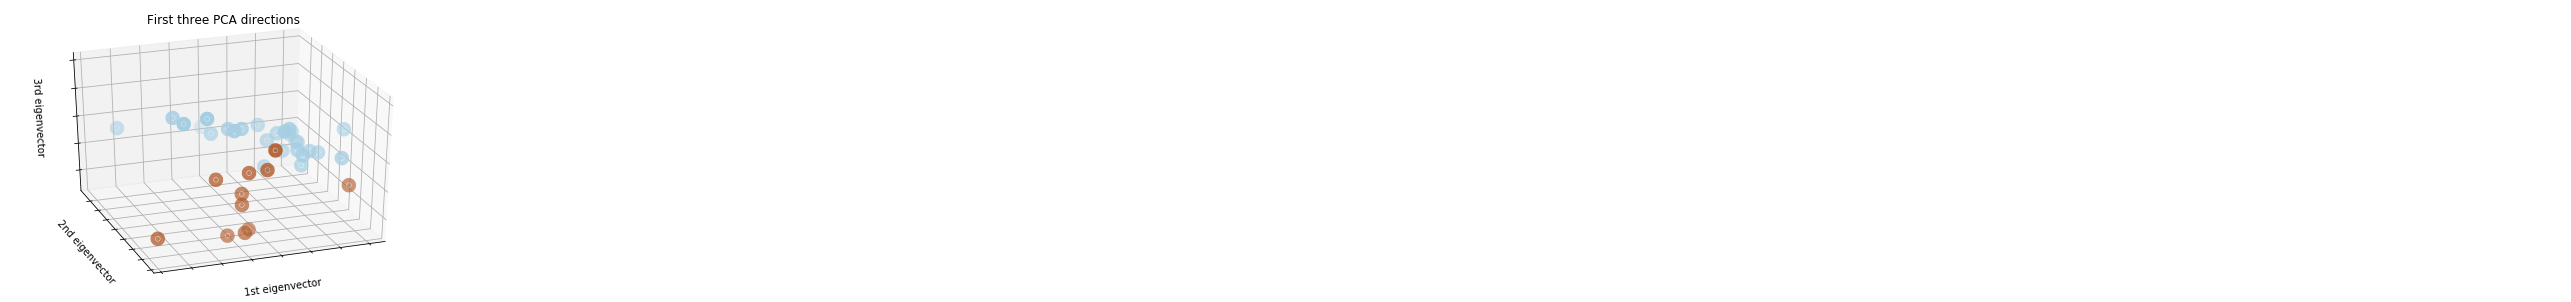

In [233]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=6)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['cat']

from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

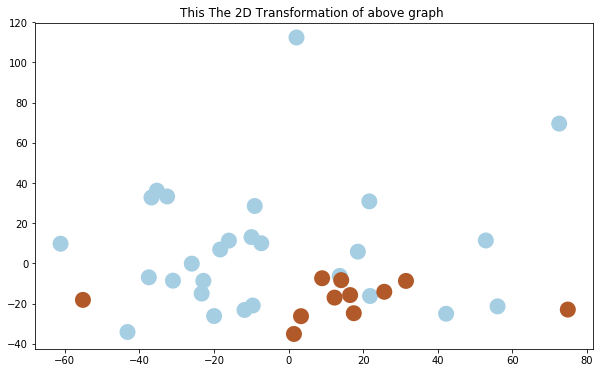

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df['cat'],cmap=plt.cm.Paired,linewidths=10)
# plt.annotate('Cancer Cluster',xy=(20,-20),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")

(YOUR INTERPRETATION HERE)

From the 2D visualization, we can see a cluster of brown dots that seem to represent a cluster of data points for individuals with cancer present. We can see the outliers that were also shown in the initial PCA plot as well, but this time we see that two of them are not from the cancer cluster, while one of them has a presence of cancer (the brown point on the far right), however it is different and is far away from the cluster of brown data points. This may show that certain data points may show genetic similarities that could determine a presence or absence of the cancer type in question. 

# Part 3: Exploratory Factor Analysis

## 3.1. Create factor model with two factors and compare it to your PCA results. What are the similarities and differences? (10 pts.)

In [27]:
# build a 2-factor model -- Data scaled here --
fa_model = skd.FactorAnalysis(n_components=2).fit(train_norm.ix[:,:])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:2,:].T, 
             index=train_norm.columns,
             columns=['Factor1', 'Factor2'])
df_loadings

,Factor1,Factor2
0,-0.432488,-0.038601
1,-0.226174,-0.145885
2,0.062662,-0.081362
3,0.276153,0.190083
4,-0.657385,0.154920
5,-0.709031,0.287805
6,0.091647,0.188484
7,-0.647016,0.310193
8,0.243059,-0.272250
9,0.116139,0.188267


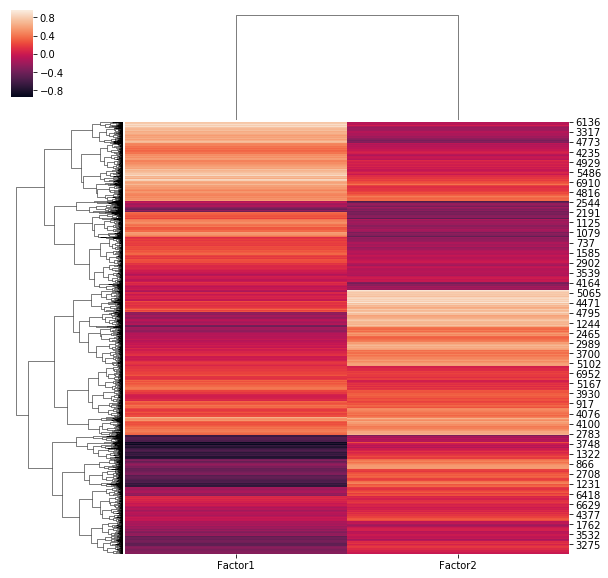

In [28]:
#--Factor Analysis - compressing to 2 components to see how well they explain the data
#--See which features stand out in each factor
sns.clustermap(df_loadings)

(YOUR INTERPRETATION HERE)

During factor analysis, orthogonal assumptions disappear. In this 2-factor factor analysis, we are looking to see if there are two factors that may be able to explain the correlation structure of the observed variables, or, if there are 2 factors influencing the observed outcomes. Factor analysis will be more general than PCA. In factor 1, it seems that there are two groups where the data has a high positive correlation (the top left portion between 6136 and 2544) and where there is a high negative correlation (between 2738 and 1231). For Factor 2, it seems that there is a group where there is a high positive correlation (between 5065 and 5102), and not as much of a high negative correlation. With factor analysis, it seems that there could be 3 separate groupings that have either high positive or negative correlations. PCA also shows three groups of data points that lie within negative and positive axes.  

Looking at the PCA biplot, we can see what seems to be a point where there are three separate groups (when looking at the orthogonal plane). One of the groups of datapoints lies within the negative x-axis with data points both positive and negative on the y-axis, one of the groups (with one arrow only) lies on the positive portion of the y-axis and mid x-axis range (or x=close to 0), while the third group has a positive x-axis and datapoints that are both negative and positive on the y-axis. 

## 3.2. Create another factor model with an additional factor and compare it to the first. What might the factors represent? (10 pts.)

In [29]:
### YOUR CODE HERE ###
# Create a three-factor model --> 
fa_model = skd.FactorAnalysis(n_components=3) \
              .fit(train_norm.ix[:,:])

# Show the loadings --> tell the realtionship bet. the initial variables and the factors extracted
#--the correlations bet. the original data and the extracted factors
df_loadings2 = pd.DataFrame(fa_model.components_[:3,:].T, 
                   index=train_norm.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings2

,Factor1,Factor2,Factor3
0,-0.426106,-0.048566,0.144224
1,-0.216089,-0.150387,0.155109
2,0.068515,-0.080801,0.035300
3,0.294743,0.189770,0.634626
4,-0.647191,0.139660,0.361499
5,-0.705120,0.270979,0.320259
6,0.086925,0.190818,-0.028900
7,-0.656219,0.297938,-0.048160
8,0.240572,-0.266705,-0.136563
9,0.123205,0.190154,0.302113


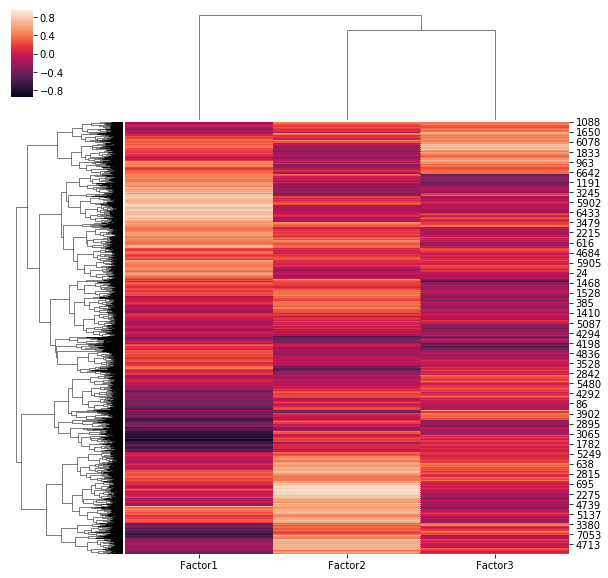

In [30]:
#--Factor 2 light area
#--Factor 1 darker area
sns.clustermap(df_loadings2)

(YOUR INTERPRETATION HERE)

For the Factor 3 analysis, there seem to be 3 pronounced groups and one semi-pronounced group (4 groups total). 
- Factor 1: If we look at the lightest and darkest areas, it seems that there are two thicker portions, one which is light (between 1191 and 3479) and one that is dark (between 4292 and 5249). There are other portions with distinct bands, but these seem to be the thickest clusters. For the light band, it would seem that for Factor 1 these could be the genes that have the highest positive correlation. For the dark band, this could be a cluster of genetic information that explains the highest negative correlation.
- Factor 2: lightest area shows most highly positive correlation (between 5249 and 3380). These could be genes that a practitioner may want to look more closely into and focus on. 
- Factor 3: The lightest area in Factor 3 does not have as high of a positive correlation as the positive groups in Factor 1 and Factor 1, but is notably different from the rest of the data within Factor 3. It seems to be capturing an extra group that was not apparent when doing only a 2-Factor analysis above.

**Compare 2-Factor to 3-Factor**
It seems that the 2-Factor analysis showed what seemed to be 3 distinct groups, while the 3-Factor analysis also shows 3 distinct groups in the first 2 factors, plus an additional group in the Factor 3. In this dataset, adding an extra factor also added an extra group. 

**What might the factors represent?**
It seems that the factors may represent groups of genes that could be either positively or negatively correlated with cancer. These could be indicators to researchers of what genetic information/genetic combinations could be useful in looking for, or helping predict individuals who may have cancer, or may possibly develop cancer in the future based on their genetic makeup. 

# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

In [32]:
#--Apply dimension reduction--
#use PCA results and do cluster analysis on the reduced dataset

pca_model2 = skd.PCA().fit(train_norm.ix[:,:])
pca_model2.components_.shape

(38, 7129)

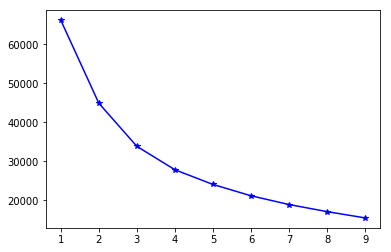

In [39]:
#--1. find silhouette score --> do gridsearch to find optimal parameters
#--2. create cluster plot from silhouette score

#--Point you want is where it looks like it's starting to flatten out
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import metrics


inertia_values = []
e_results = {}
for k in range(1, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
#     prediction = kmeans.predict(X)
#     e_results[k] = kmeans.inertia_(X, prediction)
    

# fig = plt.figure(figsize=(11, 1))
# plt.plot(range(1, 20), inertia_values)
# plt.grid(True)
# plt.title('Elbow curve')

fig, ax = plt.subplots()
plt.plot(range(1,10), inertia_values, "b*-")

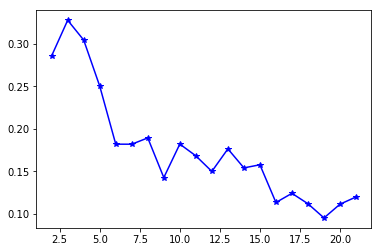

In [41]:
#--Silhouette Method--
from sklearn.metrics import silhouette_samples, silhouette_score 

silhouette_values = []

for k in range(2, 22):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(X)
    prediction = kmeans.predict(X)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))
    
# best_size = max(results, key=results.get)


fig, ax = plt.subplots()
plt.plot(range(2,22), silhouette_values, "b*-")

**From the Elbow and silhouette plots, it looks like 5 clusters should be sufficient**

In [52]:
X=pca_model2.transform(train_norm.ix[::])
kmeans=skc.KMeans(init="k-means++", n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

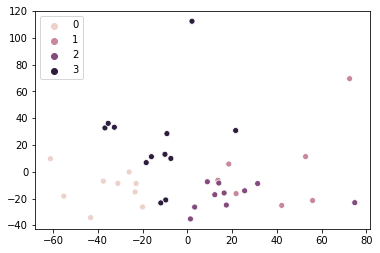

In [53]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans.labels_)

(YOUR INTERPRETATION HERE)

From my elbow and Silhouette plots it showed that I would probably be best at choosing about 4 clusters for my kmeans analysis. From that, we can see a few distinct clusters that do not overlap with other clusters. Specifically, we can see that cluster 0 and cluster 3 do not have as much data point overlap compared to cluster 1 and 2. 

I believe that the clusters may show how different patients may be similar with respect to their genetic data. Cluster 0 has a tighter cluster formation showing that their data must be more similar. Data points from cluster 3 seem mostly close, except for one outlier. The other two groups are not as distinct, showing that they may not be completely separate groups. 

It seems to show correlations in patient observations and how some patients may be positively or negatively correlated. This could be based upon each patient's total genetic makeup and how they are similar or different to one another. 

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data(5 pts.)
- Interprete your results (5 pts.)

In [50]:
X=pca_model2.transform(test_norm.ix[::])
kmeans=skc.KMeans(init="k-means++", n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

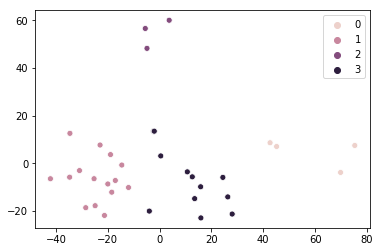

In [51]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans.labels_)
#--Do kmeans clustering on pca_samples, then visualize it and interpret

(YOUR INTERPRETATION HERE)

Looking at the test data, we can see different clusters of data points than in the training data. The test data seems to have more distinctly formed clusters than the training data did. 

- Factor 0: we can see a distinct cluster here that is distinctly far away from the rest of the clusters. Some of the data points are close to one another, while some are not as close. 
- Factor 1: This is a larger cluser of data points that is farily close. 
- Factor 2: This shows a few data points 
- Factor 3: This shows a distinct cluster with data points that are fairly close, but not completely close to one another. 

There are some data points/clusters that lie on the negative side of the x-axis, while there are other distinct groups that lie on the more positive side of the x-axis. These groups seem that they could represent patients with similar genetic material, which could be useful in determining cancer presence or absence.  